In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\navs9\AppData\Local\Temp\ipykernel_14776\3072230484.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
data = pd.read_excel("healthcare-stroke-data.xlsx")
data

,gender,age,hypertension,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,Yes,Self-employed,Rural,202.21,32.5,never smoked,1
2,Male,80.0,0,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,Yes,Private,Urban,83.75,32.5,never smoked,0
5106,Female,81.0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
gender               0
age                  0
hypertension         0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# List of columns to label encode
columns_to_encode = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column in the list
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

# Display the updated DataFrame
print(data.head())

   gender   age  hypertension  ever_married  work_type  Residence_type  \
0       1  67.0             0             1          2               1   
1       0  61.0             0             1          3               0   
2       1  80.0             0             1          2               0   
3       0  49.0             0             1          2               1   
4       0  79.0             1             1          3               0   

   avg_glucose_level   bmi  smoking_status  stroke  
0             228.69  36.6               1       1  
1             202.21  32.5               2       1  
2             105.92  32.5               2       1  
3             171.23  34.4               3       1  
4             174.12  24.0               2       1  


In [ ]:
data.shape

(5110, 10)

In [ ]:
data.columns

Index(['gender', 'age', 'hypertension', 'ever_married', 'work_type',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status',
       'stroke'],
      dtype='object')

In [ ]:
X= data[['gender', 'age', 'hypertension', 'ever_married', 'work_type',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']]
y=data['stroke']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
y_pred_logistic = logistic_model.predict(x_test)

# Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)
y_pred_tree = decision_tree_model.predict(x_test)

# Define a function to evaluate models
def evaluate_model(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))

print("Logistic Regression Performance:")
evaluate_model(y_test, y_pred_logistic)

print("\nDecision Tree Performance:")
evaluate_model(y_test, y_pred_tree)

Logistic Regression Performance:
Accuracy: 0.9393346379647749
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Decision Tree Performance:
Accuracy: 0.9050880626223092
Precision: 0.1568627450980392
Recall: 0.12903225806451613
F1 Score: 0.1415929203539823


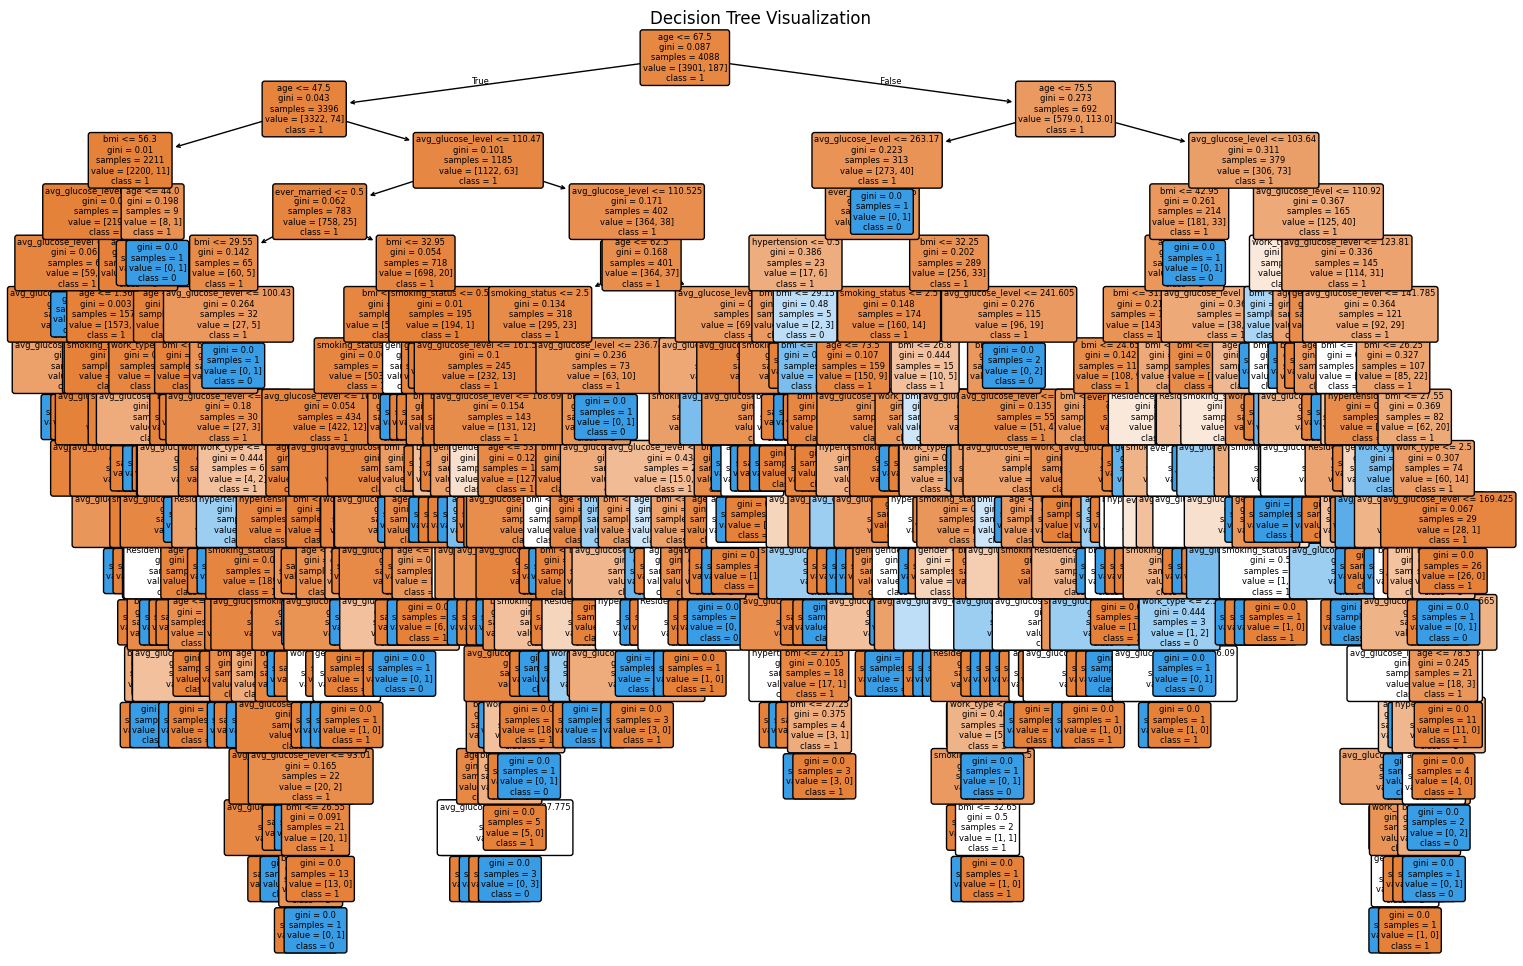

In [ ]:
# Visualize the Decision Tree
plt.figure(figsize=(18, 12))
tree.plot_tree(decision_tree_model, feature_names=X.columns, class_names=['1','0'], filled=True, rounded=True, fontsize=6)
plt.title("Decision Tree Visualization")
plt.show()

In [ ]:
#pre pruning randomly selected max_depth = 6
#post pruning after fully growing tree example ccp_alpha

In [ ]:
decision_tree_model_2 = DecisionTreeClassifier(
     random_state=42,
    max_depth=6,               # Limit the maximum depth of the tree
    min_samples_split=10,      # Minimum number of samples required to split an internal node
    min_samples_leaf=5         # Minimum number of samples required to be a leaf node
)
decision_tree_model_2.fit(x_train, y_train)
y_pred_tree = decision_tree_model_2.predict(x_test)

In [ ]:
def evaluate_model(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))

In [ ]:
print("\nDecision Tree Performance:")
evaluate_model(y_test, y_pred_tree)


Decision Tree Performance:
Accuracy: 0.9373776908023483
Precision: 0.3333333333333333
Recall: 0.03225806451612903
F1 Score: 0.058823529411764705


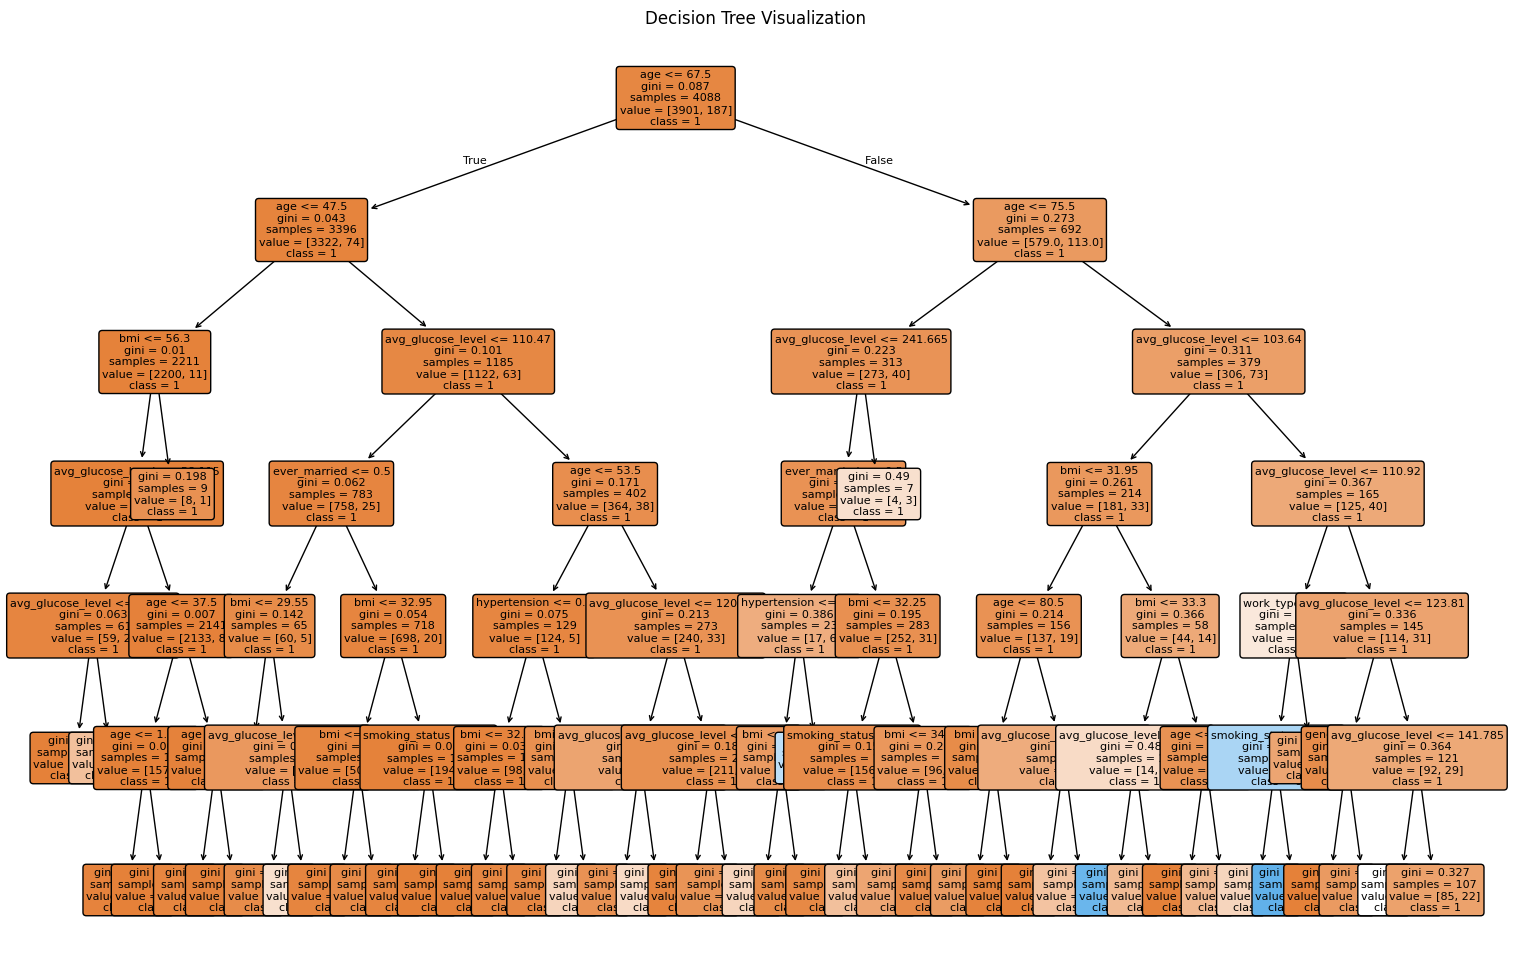

In [ ]:
# Visualize the Decision Tree
plt.figure(figsize=(18, 12))
tree.plot_tree(decision_tree_model_2, feature_names=X.columns, class_names=['1','0'], filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree Visualization")
plt.show()

In [ ]:
# 'entropy' instead of 'gini'
from sklearn.tree import DecisionTreeClassifier

decision_tree_model_3 = DecisionTreeClassifier(
    random_state=42,
    criterion="entropy",       # Use 'entropy' instead of 'gini'
    max_depth=6,               # Limit the maximum depth of the tree
    min_samples_split=10,      # Minimum number of samples required to split an internal node
    min_samples_leaf=5         # Minimum number of samples required to be a leaf node
)
decision_tree_model_3.fit(x_train, y_train)
y_pred_tree = decision_tree_model_3.predict(x_test)

In [ ]:
def evaluate_model(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))

In [ ]:
print("\nDecision Tree Performance:")
evaluate_model(y_test, y_pred_tree)


Decision Tree Performance:
Accuracy: 0.9393346379647749
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


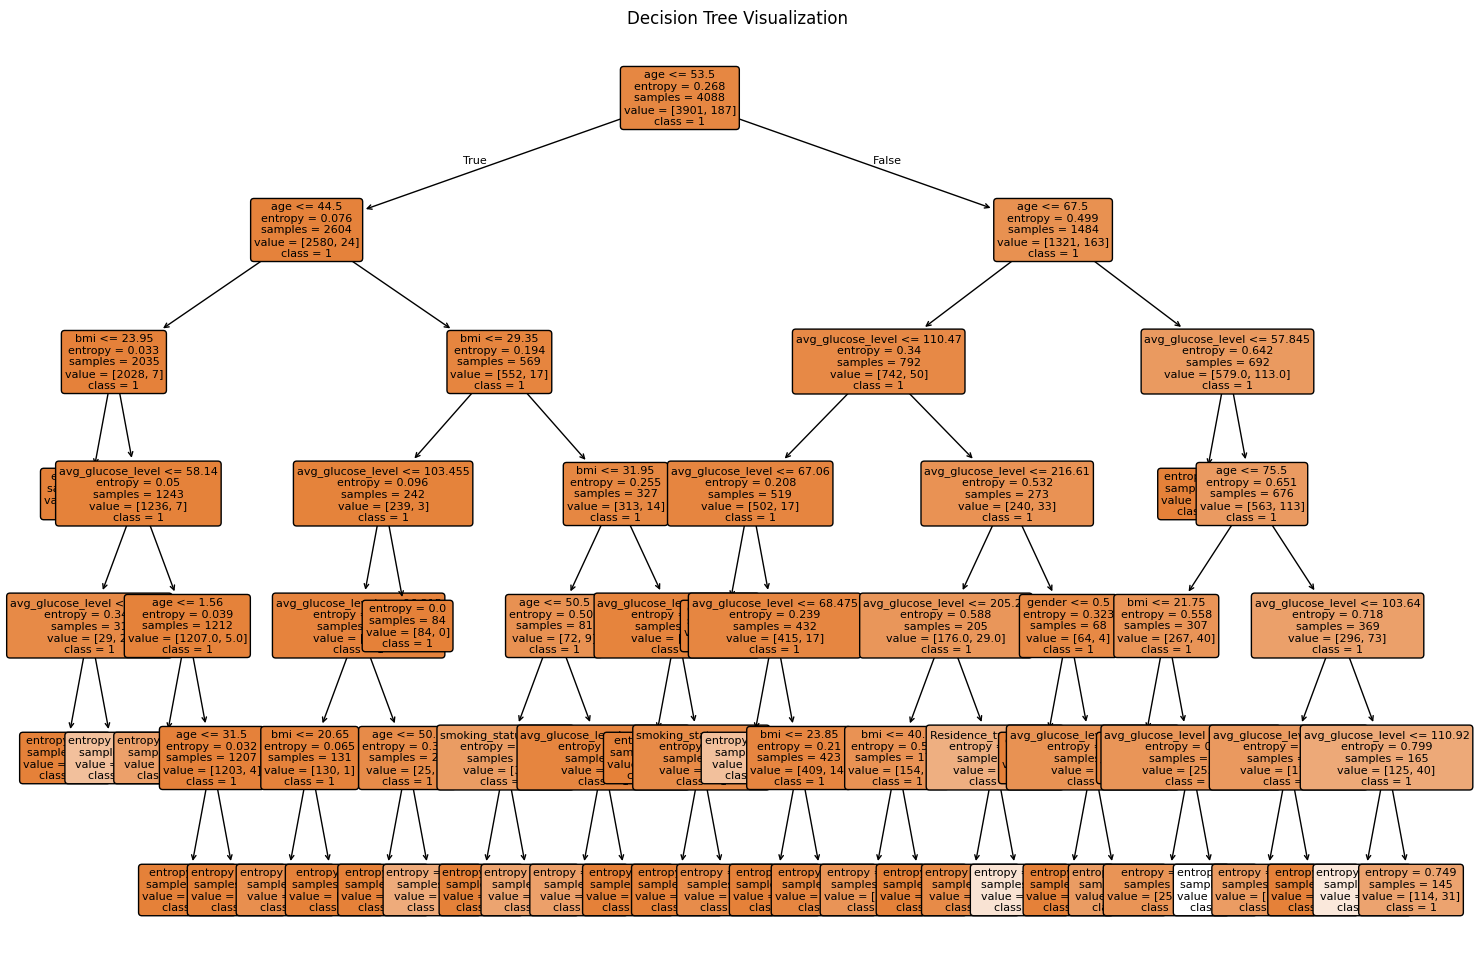

In [ ]:
# Visualize the Decision Tree
plt.figure(figsize=(18, 12))
tree.plot_tree(decision_tree_model_3, feature_names=X.columns, class_names=['1','0'], filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree Visualization")
plt.show()

In [ ]:
#Hyper parameter tuning

parameters={
'criterion':['gini', 'entropy'],
'max_depth':[1,2,3,4,5],
'max_features': ['log2', 'sqrt']
}

#gridsearchcv, randomsearchcv
from sklearn.model_selection import GridSearchCV
model=DecisionTreeClassifier()
cv=GridSearchCV(model,parameters, scoring=['accuracy'],refit='accuracy')

cv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['log2', 'sqrt']},
             refit='accuracy', scoring=['accuracy'])

In [ ]:
cv.best_estimator_

DecisionTreeClassifier(max_depth=1, max_features='log2')

In [ ]:
p3=cv.predict(x_test)
accuracy_score(y_test,p3)

0.9393346379647749

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameters
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5],
    'max_features': ['log2', 'sqrt']
}

model = DecisionTreeClassifier()

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=parameters,
    scoring='accuracy',  # Using a single metric
    n_iter=10,  # Number of parameter settings sampled
    cv=5,  # 5-fold cross-validation
    random_state=42
)

random_search.fit(x_train, y_train)

print("Best Hyperparameters:", random_search.best_params_)

# Evaluating best model on test data
best_model = random_search.best_estimator_
accuracy = best_model.score(x_test, y_test)
print(f"Best Model Accuracy on Test Data: {accuracy:.4f}")

Best Hyperparameters: {'max_features': 'log2', 'max_depth': 1, 'criterion': 'gini'}
Best Model Accuracy on Test Data: 0.9393


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 4,)

In [ ]:
neigh.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
yp=neigh.predict(x_test)

In [ ]:
accuracy_score(y_test,yp)

0.9363992172211351

In [ ]:
decision_tree_model_2.get_params()  # Type this and press Tab


NameError: name 'decision_tree_model_2' is not defined

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.get_params()


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}